## How good is the strategy?

#### Import packages

In [1]:
# import data packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from analysis import *

c:\Users\bened\Documents\Alameda-Project\analysis.py:14: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  all_bets = all_bets.merge(all_bets["Venue"].str.rsplit(" ", 1, expand=True).rename(columns = {0: "Venue", 1: "Race Number"}), left_index=True, right_index=True, how = 'right')


104.56347645040086 308
106.87473974332421 43
       Datetime              Horse                 Type Location  Price  \
109  07-01-2023     Aldebaran Zeus   RaceType.TROT_RACE      AUS   10.0   
110  07-01-2023             Annika  RaceType.HORSE_RACE      AUS   10.0   
111  07-01-2023     Aussie Sojourn  RaceType.HORSE_RACE      AUS    6.0   
112  07-01-2023        Beach Magic   RaceType.TROT_RACE      AUS   10.0   
113  07-01-2023      Bend The Knee  RaceType.HORSE_RACE      AUS   10.0   
..          ...                ...                  ...      ...    ...   
177  07-01-2023     Titanium Power  RaceType.HORSE_RACE      AUS    9.0   
178  07-01-2023  Universal Playboy  RaceType.HORSE_RACE      AUS    8.0   
179  07-01-2023      Western Style   RaceType.TROT_RACE      AUS    6.0   
180  07-01-2023      Wineglass Bay  RaceType.HORSE_RACE      AUS    5.5   
181  07-01-2023               Worx  RaceType.HORSE_RACE      AUS    6.5   

     Midpoint Price        Venue  Midpoint Percentage 

#### Manipualte base data

In [2]:
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['profit/loss'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1) - 1, -1)
all_bets['winnings'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['kelly'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['implied_probability'] = 1 / all_bets['Price']

#let's filter the data to only observations where the price > midpoint price:
midpoint_strat_profit = all_bets[all_bets['Price'] > all_bets['Midpoint Price']]
profit = sum(all_bets['profit/loss'])
winnings = sum(all_bets['winnings'])
returns = profit / len(all_bets) * 100

# let's group the data by characteristics and see if there is a difference in key metrics:
location_returns = all_bets.groupby('Location')['profit/loss'].sum()
location_returns = location_returns.sort_values(ascending=False)

venue_returns = all_bets.groupby('Venue')['profit/loss'].sum()
venue_returns = venue_returns.sort_values(ascending=False)

race_type_returns = all_bets.groupby('Type')['profit/loss'].sum()
race_type_returns = race_type_returns.sort_values(ascending=False)

#### How good are our bets thus far?

In [3]:
print(f'From a total of {len(all_bets)} bets, betting $1 on every horse yielded a total profit of: ${profit}')
print(f'This equates to a return on investment (${len(all_bets)} base investment) of: {round(returns, 3)} percent.')

display(location_returns)
display(venue_returns)
display(race_type_returns)

From a total of 308 bets, betting $1 on every horse yielded a total profit of: $12.350000000000016
This equates to a return on investment ($308 base investment) of: 4.01 percent.


Location
AUS    32.00
USA   -19.65
Name: profit/loss, dtype: float64

Venue
Menangle            18.50
Gawler               9.70
Bendigo              8.50
Shepparton           8.25
Mackay               7.80
Hobart               7.00
Sandown              6.00
Warragul             5.85
Ballarat             5.70
Richmond             5.50
Warwick Farm         5.50
Addington            4.50
Werribee             2.60
Rosehill             2.00
Rockhampton          1.85
Newcastle            1.50
Hawkesbury           1.20
The Meadows          1.05
Wyong                1.00
Darwin               0.70
Redcliffe            0.50
Delta Downs          0.50
Wagga                0.45
Remington Park       0.10
Cannington          -0.05
Angle Park          -0.45
Bathurst            -0.50
Traralgon           -0.50
Casino              -1.00
Belmont             -1.00
Mount Gambier       -1.00
Tamworth            -1.00
Geraldton           -1.00
Ascot               -1.45
Swan Hill           -2.00
Townsville          -2.00
Globe Derby         -2.00
Doomben             -2.00
Albion

Type
RaceType.TROT_RACE         28.45
RaceType.GREYHOUND_RACE     3.40
RaceType.HORSE_RACE       -19.50
Name: profit/loss, dtype: float64

#### How indicative of the BSP is the midpoint price?

On average the midpoint price is $-1622.973 off from the BSP


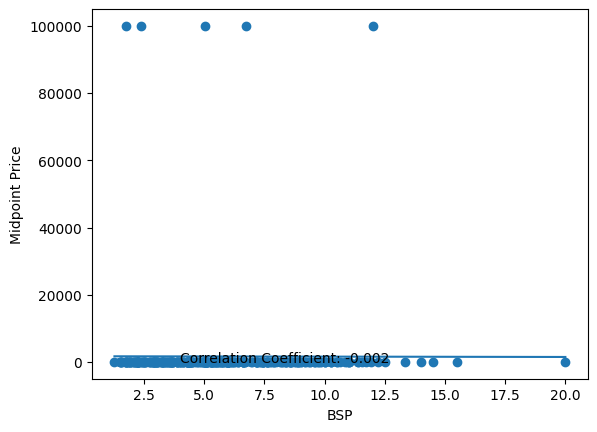

In [4]:
# Let's calculate how far off the midpoint price is from BSP
all_bets['midpoint difference'] = all_bets['BSP'] - all_bets['Midpoint Price']
sum(all_bets['midpoint difference'])

# lets plot the correlation of the BSp with the midpoint price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Midpoint Price'])
plt.xlabel('BSP')
plt.ylabel('Midpoint Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Midpoint Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Midpoint Price"])[0,1], 3)}')
print(f'On average the midpoint price is ${round(np.mean(all_bets["midpoint difference"]), 3)} off from the BSP')

#### How indicative of the BSP is the Betr price?

On average the betr price is $-0.03 off from the BSP


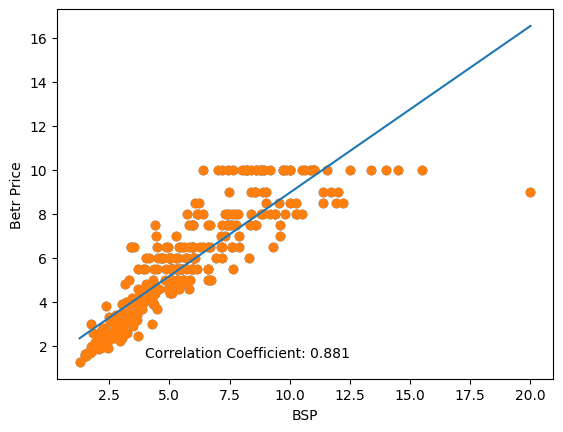

In [5]:
all_bets['betr difference'] = all_bets['BSP'] - all_bets['Price']
sum(all_bets['betr difference'])

# lets plot the correlation of the BSP with the price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.xlabel('BSP')
plt.ylabel('Betr Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Price"])[0,1], 3)}')
print(f'On average the betr price is ${round(np.mean(all_bets["betr difference"]), 3)} off from the BSP')

#### How good would of betting with the Kelly Criterion been?

Thus far we have assumed we made \\$1 bets for every horse - but what if the bet size was a function of the implied probability we derive from the price. The below code sees how well we would of done using the kelly criterion for stake sizes assuming we initially placed \\$100 in. 

Text(0, 1200, 'initial stake: $100')

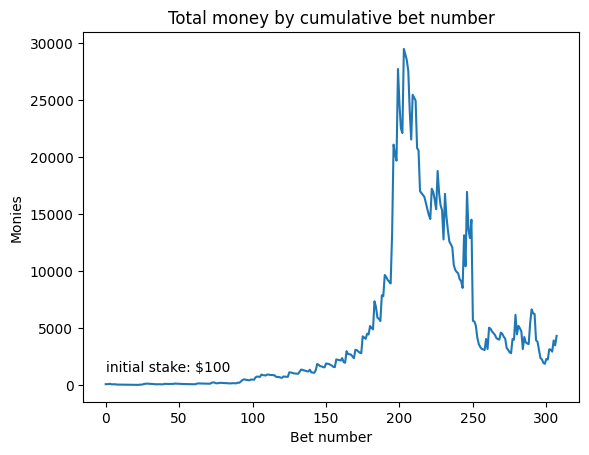

In [6]:
initial_stake = 100
bets = len(all_bets)
monies_array = [initial_stake]

def kelly_fraction(prob, prop_bet_gained):
  return ((prob) - ((1 - prob)) / prop_bet_gained) # need to check correct formula two sites differerd.

for bet in range(1,bets):
    index = bet - 1 
    prob = all_bets['implied_probability'][index]
    price = all_bets['Price'][index]
    prop_bet_gained = (price*1) /1
    kelly_frac = kelly_fraction(prob, prop_bet_gained)
    kelly = kelly_frac * monies_array[-1]

    if all_bets['WIN_LOSE'][index] == 1:
        total_purse = monies_array[-1] + (price * kelly)
        monies_array.append(total_purse)
    else:
        total_purse = monies_array[-1] - (kelly)
        monies_array.append(total_purse)

plt.plot(monies_array)
#lets add axis titles and labels:
plt.xlabel('Bet number')
plt.ylabel('Monies')
plt.title('Total money by cumulative bet number')
plt.text(0, 1200, f'initial stake: ${initial_stake}')

### *below is Ben playing around*

#### Profit from all bets- assuming BSP is long run probability. 

In [21]:
print(f'From a total of ({len(all_bets)} bets) the overall turnover for all our bets is: {all_bets.Turnover.mean()}.')
print(f'This would equate to a profit of {round(all_bets.Turnover.mean() * 100 - 100, 3)} percent- (assuming BSP is accurate in long run)')



From a total of (57 bets) the overall turnover for all our bets is: 1.0162206646147807.
This equates to a profit of 1.622 percent.


#### Profit if we had only bet when the price was better than the midpoint price:

In [27]:
print(f'From a total of ({len(midpoint_strat_profit)} bets) the overall turnover for all our bets is: {midpoint_strat_profit.Turnover.mean()}.')
print(f'This equates to a profit of {round(midpoint_strat_profit.Turnover.mean() * 100 - 100, 3)} percent.')

From a total of (56 bets) the overall turnover for all our bets is: 1.0126070313748599.
This equates to a profit of 1.261 percent.
